# Cholera Cases Per Year in Bordering Countries within Africa (Nigeria / Niger) and Asia (Myanmar and Thailand)

In [1]:
#import dependencies 
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Data for regression plots - WHO cholera data from http://apps.who.int/gho/data/node.home

the_csv = "Resources/Cholreg.csv"
csv_one_sigma = "Resources/Cholregonesigma.csv"
miss4 = "Resources/chol_missing_4.csv"
myan = "Resources/myanmar.csv"
thai = "Resources/thailand.csv"
nige = "Resources/niger.csv"
nigeria = "Resources/nigeria.csv"

cholera_data = pd.read_csv(the_csv)
cholera_sig = pd.read_csv(csv_one_sigma)

#Read regression datasets into dataframes 

missing = pd.read_csv(miss4)
myanm = pd.read_csv(myan)
thail = pd.read_csv(thai)
ni = pd.read_csv(nige)
nie = pd.read_csv(nigeria)

In [3]:
#pull data from csvs 
#FAO data set from http://www.fao.org/nr/water/aquastat/data/query/index.html
fao_data_csv = "Resources/aquastatt.csv"
who_data_csv = "Resources/choleraa.csv"

#read into dataframe 

fao_data=pd.read_csv(fao_data_csv)
chol_data = pd.read_csv(who_data_csv)

#test FAO data
fao_data.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Md
0,Myanmar,28.0,Dependency ratio,4192.0,1992.0,14.13,I,NaN
1,Myanmar,28.0,Dependency ratio,4192.0,1997.0,14.13,I,NaN
2,Myanmar,28.0,Dependency ratio,4192.0,2002.0,14.13,I,NaN
3,Myanmar,28.0,Dependency ratio,4192.0,2007.0,14.13,I,NaN
4,Myanmar,28.0,Dependency ratio,4192.0,2012.0,14.13,I,NaN


In [4]:
#check columns for unique values 
fao_data.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Md'],
      dtype='object')

In [5]:
#Remove superfluous columns 

fao_cleanup = fao_data[["Area", "Variable Name", "Year", "Value"]]
fao_cleanup.head()

,Area,Variable Name,Year,Value
0,Myanmar,Dependency ratio,1992.0,14.13
1,Myanmar,Dependency ratio,1997.0,14.13
2,Myanmar,Dependency ratio,2002.0,14.13
3,Myanmar,Dependency ratio,2007.0,14.13
4,Myanmar,Dependency ratio,2012.0,14.13


In [6]:
#FAO data 

#use .loc to filter out just rows with country names at head (take out rows at end that don't have data)
fao_targets = fao_cleanup.loc[fao_cleanup["Area"].isin(["Myanmar","Niger", "Nigeria", "Thailand"])]
fao_targets.index.name = "Index"

#Rename columns 

fao_final = fao_targets.rename(columns={"Area":"Country"})

#convert year data to integers 
fao_final["Year"] = fao_final["Year"].astype(int)
fao_final

#Final FAO Dataset

fao_final.head()

,Country,Variable Name,Year,Value
Index,,,,
0,Myanmar,Dependency ratio,1992,14.13
1,Myanmar,Dependency ratio,1997,14.13
2,Myanmar,Dependency ratio,2002,14.13
3,Myanmar,Dependency ratio,2007,14.13
4,Myanmar,Dependency ratio,2012,14.13


In [7]:
#Testing WHO data 
count2 = len(chol_data["COUNTRY (DISPLAY)"].value_counts())

#creating a new dataframe with selected columns from WHO data 

clean_data = chol_data[["COUNTRY (DISPLAY)","YEAR (DISPLAY)","Display Value"]]

clean_df = pd.DataFrame(clean_data)

clean_df.head()


,COUNTRY (DISPLAY),YEAR (DISPLAY),Display Value
0,Afghanistan,1960,887
1,Bangladesh,1960,15618
2,India,1960,14621
3,Indonesia,1960,41
4,Myanmar,1960,259


In [8]:
#Select data for specific countries from WHO data 
who_final = clean_df.loc[clean_df["COUNTRY (DISPLAY)"].isin(["Nigeria","Niger","Myanmar", "Thailand"])]

#Rename column heads 
who_final = who_final.rename(columns = {"COUNTRY (DISPLAY)": "Country", "YEAR (DISPLAY)": "Year", "Display Value": "Cholera Cases"})

#Final WHO dataframe 
who_final.head()

,Country,Year,Cholera Cases
4,Myanmar,1960,259
13,Myanmar,1965,207
17,Thailand,1965,65
64,Myanmar,1993,1758
68,Nigeria,1993,4160


In [9]:
#merge dataframes to join countries on YEAR and COUNTRY, to sift out years for which there are no water safety data
total_data = pd.merge(who_final, fao_final, on=["Year", "Country"],how ="right")
total_data =total_data.sort_values("Year")

#Unique value names under variables from FAO data 

total_data["Variable Name"].unique()



array(['Treated municipal wastewater', 'Dependency ratio',
       'Total population with access to safe drinking-water (JMP)',
       'Population affected by water related disease',
       'Not treated municipal wastewater'], dtype=object)

In [10]:
#Clean out NaN values - replace with zeros
total_data= total_data.fillna(0)
total_data.head()

,Country,Year,Cholera Cases,Variable Name,Value
53,Thailand,1990,0.0,Treated municipal wastewater,0.00
1,Myanmar,1992,826.0,Dependency ratio,14.13
2,Myanmar,1992,826.0,Total population with access to safe drinking-...,58.60
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40


In [11]:
#Pull chart data for West African countries 
africa_data= total_data[total_data["Country"].isin(["Nigeria", "Niger"])]
africa_data.head()

,Country,Year,Cholera Cases,Variable Name,Value
3,Nigeria,1992,8687.0,Dependency ratio,22.78
4,Nigeria,1992,8687.0,Total population with access to safe drinking-...,42.40
46,Niger,1992,0.0,Total population with access to safe drinking-...,35.70
45,Niger,1992,0.0,Dependency ratio,89.72
11,Niger,1997,259.0,Dependency ratio,89.72


In [12]:
#Pull chart data for Southeast Asia countries 
asia_data= total_data[total_data["Country"].isin(["Myanmar", "Thailand"])]
asia_data.head()

,Country,Year,Cholera Cases,Variable Name,Value
53,Thailand,1990,0.0,Treated municipal wastewater,0.00
1,Myanmar,1992,826.0,Dependency ratio,14.13
2,Myanmar,1992,826.0,Total population with access to safe drinking-...,58.60
48,Thailand,1992,0.0,Total population with access to safe drinking-...,88.20
47,Thailand,1992,0.0,Dependency ratio,48.81


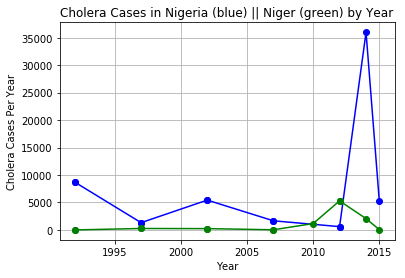

In [14]:
#Figure 1 -  CHOLERA CASES BY YEAR, WEST AFRICA

# Niger/Nigeria - building plots based on countries
nigeria = africa_data.loc[africa_data["Country"]=="Nigeria"]
niger = africa_data.loc[africa_data["Country"]=="Niger"]


x_axis = nigeria["Year"]
y_axis1 = nigeria["Cholera Cases"]

x_axis2 = niger["Year"]
y_axis2 = niger["Cholera Cases"]

plt.plot(x_axis, y_axis1,marker ='o', color='blue')
plt.plot( x_axis2, y_axis2, marker ='o', color='green')

# Add labels 
plt.title("Cholera Cases in Nigeria (blue) || Niger (green) by Year")
plt.xlabel("Year")
plt.ylabel("Cholera Cases Per Year")
plt.grid(True)
plt.savefig('CholeraPerYear_Africa.png', dpi = 300)
plt.show()



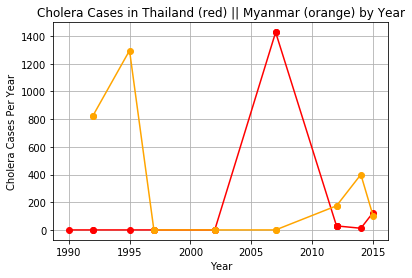

In [15]:
#Figure 2 - CHOLERA CASES BY YEAR, SOUTHEAST ASIA


thailand = asia_data.loc[asia_data["Country"]=="Thailand"]
myanmar = asia_data.loc[asia_data["Country"]=="Myanmar"]

x_axis = thailand["Year"]
y_axis1 = thailand["Cholera Cases"]

x_axis2 = myanmar["Year"]
y_axis2 = myanmar["Cholera Cases"]
plt.plot(x_axis, y_axis1,marker ='o', color='red')
plt.plot( x_axis2, y_axis2, marker ='o', color='orange')

# Add labels 
plt.title("Cholera Cases in Thailand (red) || Myanmar (orange) by Year")
plt.xlabel("Year")
plt.ylabel("Cholera Cases Per Year")
plt.grid(True)
plt.savefig('CholeraPerYear_Asia.png', dpi = 300)
plt.show()

In [16]:
#Nigeria - get data for d-ratio and safe water lines

nigeria_df= africa_data.loc[africa_data["Country"]== "Nigeria"]
nigeria_ratio = nigeria_df.loc[nigeria_df["Variable Name"]=="Dependency ratio"]
nigeria_cleanwater = nigeria_df.loc[nigeria_df["Variable Name"]=="Total population with access to safe drinking-water (JMP)"]

In [25]:
#Niger - get data for d-ratio and safe water lines

niger_df= africa_data.loc[africa_data["Country"]== "Niger"]
niger_ratio = niger_df.loc[niger_df["Variable Name"]=="Dependency ratio"]
niger_cleanwater = niger_df.loc[niger_df["Variable Name"]=="Total population with access to safe drinking-water (JMP)"]

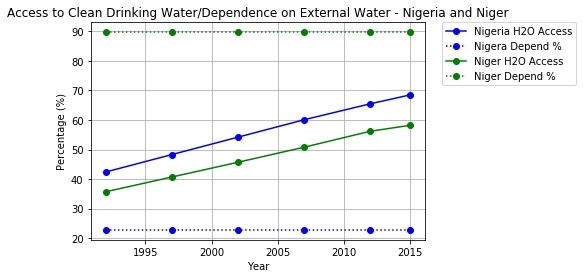

In [26]:
#Figure 3 - Nigeria/Niger cleanwater access/dep ratio

x_axis = nigeria_cleanwater["Year"]
y_axis1 = nigeria_cleanwater["Value"]
y_axis2 = nigeria_ratio["Value"]
# # y_axis2 = nigeria_dependency

# x_axis2 = myanmar_cleanwater["Year"]
y_axis3 = niger_cleanwater["Value"]
y_axis4 = niger_ratio["Value"]

nigeria_access, = plt.plot(x_axis, y_axis1, marker ='o', color='blue')
nigeria_depend, = plt.plot(x_axis, y_axis2, marker ='o', linestyle = ':',color='blue')
niger_access, = plt.plot(x_axis, y_axis3, marker ='o', color='green')
niger_depend, = plt.plot(x_axis, y_axis4, marker ='o', linestyle = ':',color='green')

plt.legend([nigeria_access, nigeria_depend, niger_access, niger_depend], ["Nigeria H2O Access", "Nigera Depend %", 
                                                                  "Niger H2O Access", "Niger Depend %"],
                                                                  bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# Add labels 
plt.title("Access to Clean Drinking Water/Dependence on External Water - Nigeria and Niger")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig('AccessToWater_Africa.png', bbox_inches = 'tight')

In [29]:
#Thailand - get data for d-ratio and safe water lines

thailand_dep= asia_data.loc[asia_data["Country"]== "Thailand"]

thailand_ratio = thailand_dep.loc[thailand_dep["Variable Name"]=="Dependency ratio"]

thailand_cleanwater = thailand_dep.loc[thailand_dep["Variable Name"]=="Total population with access to safe drinking-water (JMP)"]


In [30]:
#Myanmar - get data for d-ratio and safe water lines
myanmar_df= asia_data.loc[asia_data["Country"]== "Myanmar"]

myanmar_ratio = myanmar_df.loc[myanmar_df["Variable Name"]=="Dependency ratio"]

myanmar_cleanwater = myanmar_df.loc[myanmar_df["Variable Name"]=="Total population with access to safe drinking-water (JMP)"]


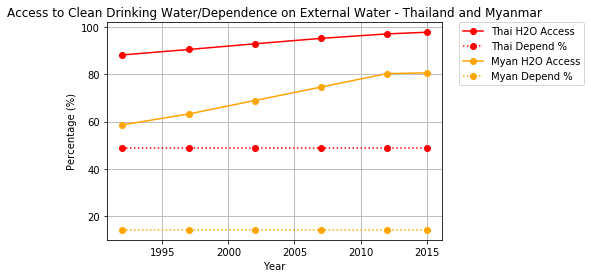

In [31]:
#Figure 4 - Thailand/Myanmar safe water/dep ratio 

x_axis = myanmar_cleanwater["Year"]
y_axis1 = myanmar_cleanwater["Value"]
y_axis2 = myanmar_ratio["Value"]
# # y_axis2 = nigeria_dependency

# x_axis2 = myanmar_cleanwater["Year"]
y_axis3 = thailand_cleanwater["Value"]
y_axis4 = thailand_ratio["Value"]

myan_access, = plt.plot(x_axis, y_axis1, marker ='o', color='orange')
myan_depend, = plt.plot(x_axis, y_axis2, marker ='o', linestyle = ':',color='orange')
thai_access, = plt.plot(x_axis, y_axis3, marker ='o', color='red')
thai_depend, = plt.plot(x_axis, y_axis4, marker ='o', linestyle = ':',color='red')

plt.legend([thai_access, thai_depend, myan_access, myan_depend], ["Thai H2O Access", "Thai Depend %", 
                                                                  "Myan H2O Access", "Myan Depend %"],
                                                                  bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

# Add labels 
plt.title("Access to Clean Drinking Water/Dependence on External Water - Thailand and Myanmar")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.savefig('AccessToWater_Asia.png', bbox_inches = 'tight')


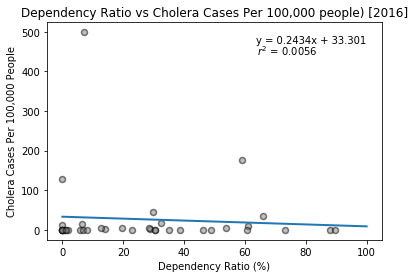

In [24]:
#Figure 5 - Regression on D-Ratio vs Cholera per 100,000 people - GLOBAL, w/ outliers

#Plotting of Regression
plt.scatter(cholera_data["Dependency Ratio (%)"], cholera_data["Cholera Cases Per 100,000 People"], color = "grey", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)

plt.title("Dependency Ratio vs Cholera Cases Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")
text= "y = 0.2434x + 33.301"
text2 = "$r^2$ = 0.0056"
plt.text(100, 470, text, ha="right", wrap=True)
plt.text(84, 440, text2, ha="right", wrap=True)
# plt.legend(,bbox_to_anchor=(1.05, 1),borderaxespad=0)

t = np.arange(0.0, 120.0, 20)
s = -0.2434*t +  33.301
line, = plt.plot(t, s, lw=2)
# plt.grid(True)

plt.savefig('Regresson_Dependency_vs_cases.png')


In [25]:
cholera_sig.head()

,Country,Population,Reported Cholera Cases,"Cholera Cases Per 100,000 People",Dependency Ratio (%)
0,Afghanistan,31056997,677,2.18,28.7200
1,Angola,12127071,78,0.64,0.2695
2,Australia,20264082,1,0.00,0.0000
3,Benin,7862944,761,9.68,60.9700
4,Burundi,8090068,434,5.36,19.7500


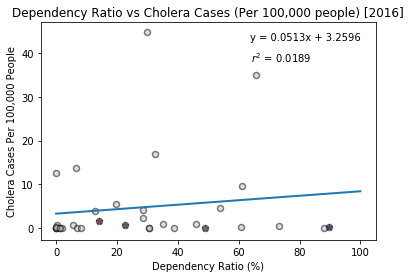

In [26]:
#Figure 6 - Regression on D-Ratio vs Cholera per 100,000 people - GLOBAL, outliers removed
plt.scatter(cholera_sig["Dependency Ratio (%)"], cholera_sig["Cholera Cases Per 100,000 People"], color = "silver", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(myanm["Dependency Ratio (%)"], myanm["Cholera Cases Per 100,000 People"], color = "red", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(thail["Dependency Ratio (%)"], thail["Cholera Cases Per 100,000 People"], color = "darkorange", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(ni["Dependency Ratio (%)"], ni["Cholera Cases Per 100,000 People"], color = "blue", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)
plt.scatter(nie["Dependency Ratio (%)"], nie["Cholera Cases Per 100,000 People"], color = "forestgreen", marker = "*", edgecolors="black", label = "Cholera", alpha = 0.5, linewidth = 1.5)


plt.title("Dependency Ratio vs Cholera Cases (Per 100,000 people) [2016]")
plt.xlabel("Dependency Ratio (%)")
plt.ylabel("Cholera Cases Per 100,000 People")


text= "y = 0.0513x + 3.2596"
text2 = "$r^2$ = 0.0189"
plt.text(100, 43, text, ha="right", wrap=True)
plt.text(84, 38, text2, ha="right", wrap=True)

t = np.arange(0.0, 120.0, 20)
s = 0.0513*t +  3.2596
line, = plt.plot(t, s, lw=2)

plt.savefig('Regresson_on_2016_Data.png')
